# Statystyczne metody przetwarzania danych 

## Laboratorium 2 - algorytm Najbliższego Sąsiada (NN)


### Opis
Celem jest zbadanie danych i opracowanie algorytmu klasyfikacji liści. Do tego celu należy zaimplementować i zastosować klasyfikator najbliższego sąsiada - NN (Nearest Neighbor).

Ukończony projekt powinien:
* Klasyfikować dwie klasy liści:
    * `Populus nigra` - klasa nr 3, 
    * `Quercus robur` - klasa nr 5.

### Zbiór danych

Zbiór danych znajduje się w `dataset/dataset.npz`. Jest to zbiór danych pobrany i zmodyfikowany z adresu: <https://archive.ics.uci.edu/ml/datasets/leaf>.

### Przesyłanie zadań

Wszystkie pliki należy spakować archiwizatorem **zip** i przesłać za pośrednictwem platformy WIKAMP. Poniżej oczekiwana zawartość archiwum:

```
+-- 📂 [IMIE I NAZWISKO].zip
    +-- 📜 Lab01.ipynb
    +-- 📂 dataset
        +-- 📜 dataset.npz
        +-- 📜 ReadMe.pdf
```

### Zadanie 1

Wczytaj dane z pliku `dataset.npz`. Plik ten zawiera zbiór danych podzielony na dwa podzbiory: treningowy `train` i testowy `test`. Każdy z nich zawiera cechy oraz indeksy klas. Dokładny opis zbioru danych znajduje się w pliku `ReadMe.pdf`.

> Podpowiedź: Możesz wykorzystać poniższy kod:
```python
with open('./dataset/dataset.npz', 'rb') as f:
    data = np.load(f)
    train, test = data['train'], data['test']
```

In [3]:
import numpy as np
with open('./dataset/dataset.npz', 'rb') as f:
    data = np.load(f)
    train, test = data['train'], data['test']

### Zadanie 2

Sprawdź: 
* ile jest wszystkich próbek z zbiorze, 
* ile jest próbek w poszczegónych klasach.

Czy zauważyłeś jakieś problemy związane z tym zbiorem danych?

In [4]:
#Suma probek
print("Ilosc probek w zbiorze treningowym (kolumn): ",len(train))
print("Rozmiar probki (wiersza): ",len(train[0]))
print("--------------------------------------")
for i in range(1,40):
    class_size = len(train[train[:,0]==i])
    print(f"Liczba probek klasy {i} wynosi: {class_size}")

"""
Zauważonym problemem jest brak próbek w klasach od 16-21 oraz 37-39.
Wynika to z samego zbioru danych, który jest niekompletny
"""

Ilosc probek w zbiorze treningowym (kolumn):  2244
Rozmiar probki (wiersza):  16
--------------------------------------
Liczba probek klasy 1 wynosi: 77
Liczba probek klasy 2 wynosi: 66
Liczba probek klasy 3 wynosi: 55
Liczba probek klasy 4 wynosi: 66
Liczba probek klasy 5 wynosi: 77
Liczba probek klasy 6 wynosi: 44
Liczba probek klasy 7 wynosi: 44
Liczba probek klasy 8 wynosi: 33
Liczba probek klasy 9 wynosi: 121
Liczba probek klasy 10 wynosi: 88
Liczba probek klasy 11 wynosi: 88
Liczba probek klasy 12 wynosi: 77
Liczba probek klasy 13 wynosi: 99
Liczba probek klasy 14 wynosi: 66
Liczba probek klasy 15 wynosi: 66
Liczba probek klasy 16 wynosi: 0
Liczba probek klasy 17 wynosi: 0
Liczba probek klasy 18 wynosi: 0
Liczba probek klasy 19 wynosi: 0
Liczba probek klasy 20 wynosi: 0
Liczba probek klasy 21 wynosi: 0
Liczba probek klasy 22 wynosi: 121
Liczba probek klasy 23 wynosi: 77
Liczba probek klasy 24 wynosi: 77
Liczba probek klasy 25 wynosi: 66
Liczba probek klasy 26 wynosi: 99
Liczba pr

'\nZauważonym problemem jest brak próbek w klasach od 16-21 oraz 37-39.\nWynika to z samego zbioru danych, który jest niekompletny\n'

### Zadanie 3

Wybierz wiersze należące do poniższych klas (rodzaje liści) i zapisz w zmiennych `train_new` oraz `test_new`:
* `Populus nigra` - klasa nr 3, 
* `Quercus robur` - klasa nr 5.

Aby wybrać jedynie te wiersze, które należą do wymienionych klas, należy przefiltrować dane po kolumnie o indeksie `0`:


In [9]:
# Wybierz klasę 3 i 5

#1 sposob (concat based)
#train[train[:,0]==3]
#train[train[:,0]==5]
#.... Concat (mniej wydajny)

#Bardziej wydajny sposob (or and (zlozone warunki))

#Uzywamy or (wybierz jesli jest rowne 3 lub 5)
#binary_vector = (train[:,0] == 3) | (train[:,0] == 5) #True False dla kazdego wiersza (czy jest klasą 3 lub 5)
#train[binary_vector]

#Numpy integrated (najlepsze dla prostych warunków)
wanted_classes = (3,5)
binary_vector_train = np.isin(train[:,0], wanted_classes) #isin(columna - okreslacjaca klase probki , wybrane klasy)
binary_vector_test = np.isin(test[:,0], wanted_classes) #isin(columna - okreslacjaca klase probki , wybrane klasy)

train_new = train[binary_vector_train]
test_new = test[binary_vector_test]

print("Liczba probek treningowych: ",len(train_new))
print("Liczba probek testowych: ",len(test_new))


Liczba probek treningowych:  132
Liczba probek testowych:  110


### Zadanie 4

A) Wybierz dwie dowolne cechy (*features*), np. o indeksach 4 i 8.<br />
B) Przedstaw graficznie próbki - na osi X i Y wartości wybranych cech.

Poniższy kod importuje moduł zawieracjący funkcje przydatne do wizualizacji danych z biblioteki `matplotlib` (*info: zwróć uwagę, że nadano alias `plt`*).
```python
import matplotlib.pyplot as plt
```

Możesz wykorzystać funkcje `plt.figure`, `plt.scatter`, `plt.legend`, `plt.title`, `plt.xlabel` i `plt.ylabel` w celu wykonania tego zadania.

Scatter: <https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.scatter.html>

>Ważne: Pamiętaj, że każdy przedstawiony wykres powinien być czytelny i posiadać następujące elementy:
* tytuł,
* opisy wszystkich osi,
* legendę.

> **Przykład**:
```python
import matplotlib.pyplot as plt
import numpy as np
plt.figure()
plt.title("Próbki")
plt.xlabel(f"Cecha 1")
plt.ylabel(f"Cecha 2")
samples = np.random.rand(2, 20, 2)
samples[0] = samples[0]-0.5
samples[1] = samples[1]+0.5
for idx, sample in enumerate(samples): # iteracja po grupach
    plt.scatter(x=sample[:, 0], y=sample[:, 1], label=idx)
plt.legend()
```
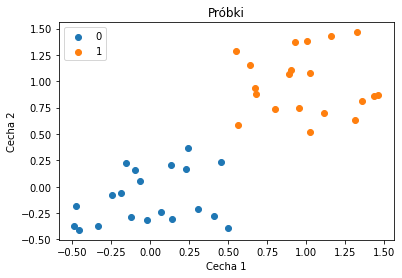

Dodatkowe zasoby:
* `pyplot`: <https://matplotlib.org/tutorials/introductory/pyplot.html>

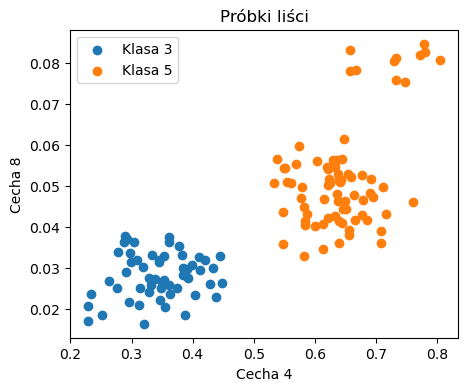

In [10]:
import matplotlib.pyplot as plt
#FUnkcja scattera
def Scatter(data, cecha_x, cecha_y, klasa, label = "defalut"):
    c = data[data[:,0] == klasa]
    c_feature_x = c[:,cecha_x]
    c_feature_y = c[:,cecha_y]
    plt.scatter(c_feature_x ,c_feature_y, label = label)


def Wykres(data, cecha_x, cecha_y, klasy):
    #Wykres
    plt.figure(figsize = (5,4))
    for kl in klasy:
        Scatter(data = data, cecha_x = cecha_x, cecha_y = cecha_y, klasa = kl, label = f"Klasa {kl}")
    #Labele
    plt.legend()
    plt.title("Próbki liści")
    plt.xlabel(f"Cecha 4")
    plt.ylabel(f"Cecha 8")

Wykres(data = train, cecha_x = 4, cecha_y = 8, klasy = [3,5] )


### Zadanie 5

Zaimplementuj funkcję `edist`, która zwróci _odległość Euklidesa_ pomiędzy punktami `x` i `y` uwzględniając wybrane cechy `features`.

$$
d(x, y) = \sqrt{\sum^{n-1}_{i=0}{(x_i - y_i)^2}}
$$


In [11]:
# <UZUPEŁNIJ PONIZEJ>
features = [1, 2] # kolumny o indeksach 1, 2
x = [0, 2, 3]
y = [0, 5, 6]

def edist(x, y, features):
    f = features
    #Feature
    scores = []
    for f in features:
        score = (x[f] - y[f])**2
        scores.append(score)
    
    return np.sum(scores)**0.5


edist(x, y, [1,2]) # wynik: 4.242640687119285



np.float64(4.242640687119285)

### Zadanie 6  

Zaimplementuj klasyfikator **najbliższego sąsiada** (*k-Nearest Neighbor*).  

1. Oblicz odległość każdego elementu ze zbioru **testowego** do każdego elementu ze zbioru **treningowego**.  
2. Znajdź element ze zbioru **treningowego**, który znajduje się najbliżej klasyfikowanego elementu ze zbioru **testowego**.  
3. Przypisz klasyfikowanemu elementowi klasę najbliższego sąsiada.  


In [16]:
# Iterujemy po zbiorze testowym
def K_Nearest(train_data, test_data, feature_list):
    predictions = []
    for test in test_data:
        distances = []
        for train in train_data:
            d = edist(train, test, feature_list) 
            distances.append(d)
    
        idx = distances.index(min(distances))
        nearest_neighbour_class = int(train_data[idx,0])
        predictions.append(nearest_neighbour_class) #Przypisanie klasy najblizszego sasiada
    return predictions

    

In [17]:
f_list = [4,8]
test_pred = K_Nearest(train_data = train_new, test_data = test_new, feature_list = f_list)
print(test_pred)

[3, 3, 5, 5, 5, 3, 3, 5, 5, 3, 3, 3, 5, 5, 5, 3, 3, 5, 5, 3, 3, 3, 5, 5, 5, 3, 3, 5, 5, 3, 3, 3, 5, 5, 5, 3, 3, 5, 5, 3, 3, 3, 5, 5, 5, 3, 3, 5, 5, 3, 3, 3, 5, 5, 5, 3, 3, 5, 5, 3, 3, 3, 5, 5, 5, 3, 3, 5, 5, 3, 3, 3, 5, 5, 5, 3, 3, 5, 5, 3, 3, 3, 5, 5, 5, 3, 3, 5, 5, 3, 3, 3, 5, 5, 5, 3, 3, 5, 5, 3, 3, 3, 5, 5, 5, 3, 3, 5, 5, 3]


### Zadanie 7
Przeprowadź klasyfikację liści dla wybranych wcześniej dwóch klas, korzystając z własnej implementacji modelu NN.

Następnie wyświetl wyniki klasyfikacji:
* Próbki treningowe i testowe.
* Każdą klasę oznacz innym kolorem.
* Próbki testowe wyróżnij innym markerem.

> Wykorzystaj parametry: `facecolors`, `edgecolors`, `marker` i `c` funkcji `scatter`.

Liczba probek treningowych:  209
Liczba probek testowych:  66


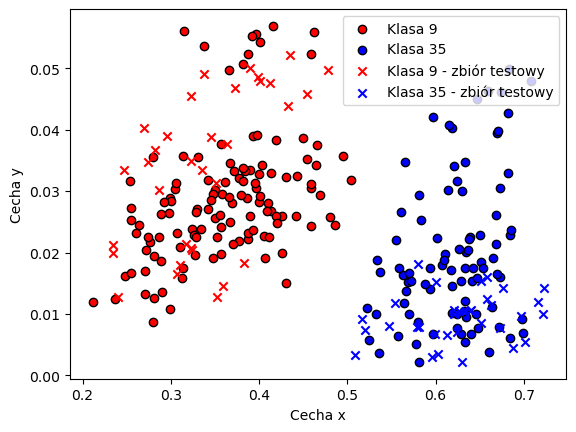

In [58]:
#Wybor danych i klas
################################################################
wanted_classes = (9,35)
binary_vector_train = np.isin(train[:,0], wanted_classes) #isin(columna - okreslacjaca klase probki , wybrane klasy)
binary_vector_test = np.isin(test[:,0], wanted_classes) #isin(columna - okreslacjaca klase probki , wybrane klasy)

Train_data = train[binary_vector_train]
Test_data = test[binary_vector_test]

print("Liczba probek treningowych: ",len(Train_data))
print("Liczba probek testowych: ",len(Test_data))

#Klasyfikacja:
################################################################
f_list = [4,8]
pred = K_Nearest(Train_data, Test_data, f_list)

def Funkcja_wykresu(data, klasa, cecha_x, cecha_y, color, edge_color, label = "default", marker = "o"):
    c = data[data[:,0] == klasa]
    c_feature_x = c[:,cecha_x]
    c_feature_y = c[:,cecha_y]
    plt.scatter(c_feature_x ,c_feature_y, label = label, facecolors = color, edgecolors = edge_color, marker = marker)
    plt.legend()
    plt.xlabel("Cecha x")
    plt.ylabel("Cecha y")

#Plot data
color_list = ["red", "blue"]
#Wykres train
for kl,c in zip(wanted_classes,color_list):
    Funkcja_wykresu(data = Train_data, klasa = kl, cecha_x = f_list[0], cecha_y = f_list[1], label = f"Klasa {kl}", color = c, edge_color = "black")
#Wykres test
for kl,c in zip(wanted_classes,color_list):
    Funkcja_wykresu(data = Test_data,
                    klasa = kl,
                    cecha_x = f_list[0],
                    cecha_y = f_list[1],
                    label = f"Klasa {kl} - zbiór testowy",
                    color = c,
                    edge_color = None,
                    marker = "x"
                   )








### Zadanie 8

Oblicz dokładność (*Accuracy*) klasyfikacji (stosunek poprawnie zaklasyfikowanych próbek do liczby wszystkich próbek wyrażony procentowo).

$$
\texttt{Accuracy} = \frac{T}{N}
$$

gdzie $T$ - liczba poprawnie zaklasyfikowanych próbek, $N$ - liczba wszystkich próbek.


In [53]:
#All training samples
n = len(Test_data)
#Binary map of predicted samples (if they are the same as ground truth)
t = (Test_data[:,0] == pred)
#Mapping
t = len(Test_data[t])
acc = t/n
print("Accuracy: ",acc)

Accuracy:  1.0


### Zadanie 9

Do zbioru dodaj jeszcze **trzy** dowolne rodzaje liści (klasy) i przeprowadź eksperyment ponownie.

Łącznie zbiór będzie zawierał **pięć** klas. Wynik wciąż należy przedstawić dla tych samych dwóch cech co wcześniej.


Liczba probek treningowych:  451
Liczba probek testowych:  264
Accuracy:  0.8181818181818182


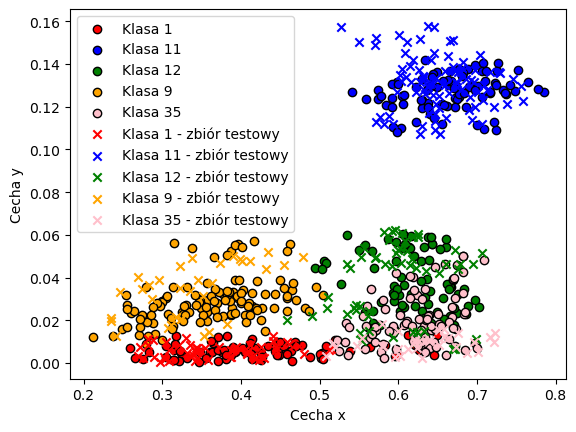

In [59]:
# Separacja zbioru z 5 klasami
#Wybor danych i klas
################################################################
wanted_classes = (1,11,12,9,35)
binary_vector_train = np.isin(train[:,0], wanted_classes) #isin(columna - okreslacjaca klase probki , wybrane klasy)
binary_vector_test = np.isin(test[:,0], wanted_classes) #isin(columna - okreslacjaca klase probki , wybrane klasy)

Train_data = train[binary_vector_train]
Test_data = test[binary_vector_test]

print("Liczba probek treningowych: ",len(Train_data))
print("Liczba probek testowych: ",len(Test_data))

#Test K-nearest:
f_list = [4,8]
pred = K_Nearest(Train_data, Test_data, f_list)

#Plotting
#######################################################
#Plot data
color_list = ["red", "blue","green","orange","pink"]
#Wykres train
for kl,c in zip(wanted_classes,color_list):
    Funkcja_wykresu(data = Train_data, klasa = kl, cecha_x = f_list[0], cecha_y = f_list[1], label = f"Klasa {kl}", color = c, edge_color = "black")
#Wykres test
for kl,c in zip(wanted_classes,color_list):
    Funkcja_wykresu(data = Test_data,
                    klasa = kl,
                    cecha_x = f_list[0],
                    cecha_y = f_list[1],
                    label = f"Klasa {kl} - zbiór testowy",
                    color = c,
                    edge_color = None,
                    marker = "x"
                   )
#Accuracy
#######################################################
#All training samples
n = len(Test_data)
#Binary map of predicted samples (if they are the same as ground truth)
t = (Test_data[:,0] == pred)
#Mapping
t = len(Test_data[t])
acc = t/n
print("Accuracy: ",acc)

### Zadanie 10

Przeprowadź eksperyment ponownie, używając tych samych parametrów co w zadaniu 9, ale z większą liczbą cech: 3, 5 i 10.

> W tym przypadku nie wyświetlaj wykresu - oblicz jedynie dokładność klasyfikacji.
> Zwiększając liczbę cech, dodawaj nowe cechy, zachowując wcześniejsze.

In [61]:
# Separacja zbioru z 5 klasami
#Wybor danych i klas
################################################################
wanted_classes = (1,11,12,9,35)
binary_vector_train = np.isin(train[:,0], wanted_classes) #isin(columna - okreslacjaca klase probki , wybrane klasy)
binary_vector_test = np.isin(test[:,0], wanted_classes) #isin(columna - okreslacjaca klase probki , wybrane klasy)

Train_data = train[binary_vector_train]
Test_data = test[binary_vector_test]

print("Liczba probek treningowych: ",len(Train_data))
print("Liczba probek testowych: ",len(Test_data))

#Test K-nearest:
feature_ll = [[4,5,8] ,
              [4,5,6,7,8] ,
              [4,5,6,7,8,9,10,11,12,13]
             ]
for f_list in feature_ll:
    pred = K_Nearest(Train_data, Test_data, f_list)
    
    #Accuracy
    #######################################################
    #All training samples
    n = len(Test_data)
    #Binary map of predicted samples (if they are the same as ground truth)
    t = (Test_data[:,0] == pred)
    #Mapping
    t = len(Test_data[t])
    acc = t/n
    print(f"Accuracy for {len(f_list)} features: ",acc)

Liczba probek treningowych:  451
Liczba probek testowych:  264
Accuracy for 3 features:  0.8143939393939394
Accuracy for 5 features:  0.8825757575757576
Accuracy for 10 features:  0.8787878787878788


### Zadanie 11

Napisz wnioski z przeprowadzonego eksperymentu.

In [62]:
"""
Ilosc cech wplywa na wynik predykcji klasyfikatora.

Nie wszystkie cechy są jednakowo wazne, niektore z nich niosa ze soba wiecej informacji (aspect_ratio > gladkosc), 
a niektore z nich sa istotne tylko w otoczniu innych cech
(np. sama wiedza o gladkosci liscia nie pomoze nam go zidentyfikowac, choc w poalczeniu z informacja o aspect ratio 
poprawi wyniki klasyfikatora, opartego tylko o ten drugi parametr)

Zwiekszajac ilosc cech mozemy spodziewac sie wiekszej zlozonosci obliczeniowej i zazwyczaj poprawy jakosci kalsyfikatora, 
choc nie zawsze, poniewaz niekture cechy moga byc redundantne lub wprowadzac informacje ktore w przypadku prostych 
klasyfikatorow moga wrecz pogorszyc jego wydajnosc (zad.10 - spadek dokladnosci przy 10 cechach w porownaniu do 5 cech)

"""

'\nIlosc cech potrafi wplywac na wynik predykcji klasyfikatora.\n\n'